In [4]:
import pandas as pd
from itertools import chain

In [11]:
filename = "percent-dev-share.csv"

In [12]:
def get_values(path):
    df = pd.read_csv(path, skiprows=12)
#     df = df.drop(columns="[all run data]")
    df = df.drop(columns="[initial & final values]")
    
    df.columns = range(1, len(df.columns)+1)
    df = df.mean()
    return df

values = get_values(filename)
values

1      777.203271
2      777.203271
3      777.203271
4      777.203271
5      777.203271
          ...    
571    280.362141
572    288.996201
573    283.302432
574    312.189502
575    331.795403
Length: 575, dtype: float64

In [16]:
import csv


def get_params(path):
    df = pd.DataFrame()
    with open(path) as csvfile:
        spamreader = csv.reader(csvfile)
        for i, row in enumerate(spamreader):
            if i < 6:
                continue
            if i >= 11:
                break
#             print(row)
            col = pd.Series(row[1:])
            try:
                col = pd.to_numeric(col)
            except ValueError:
                pass
            df[row[0]] = col.convert_dtypes()
    return df

params = get_params(filename)
params

,[run number],oak-percentage,rain-deviation,oak-tolerance-share,[steps]
0,1,0,0.5,0,2000
1,2,0,0.5,25,2000
2,3,0,0.5,50,2000
3,4,0,0.5,75,2000
4,5,0,0.5,100,2000
...,...,...,...,...,...
570,571,100,1.5,0,2000
571,572,100,1.5,25,2000
572,573,100,1.5,50,2000
573,574,100,1.5,75,2000


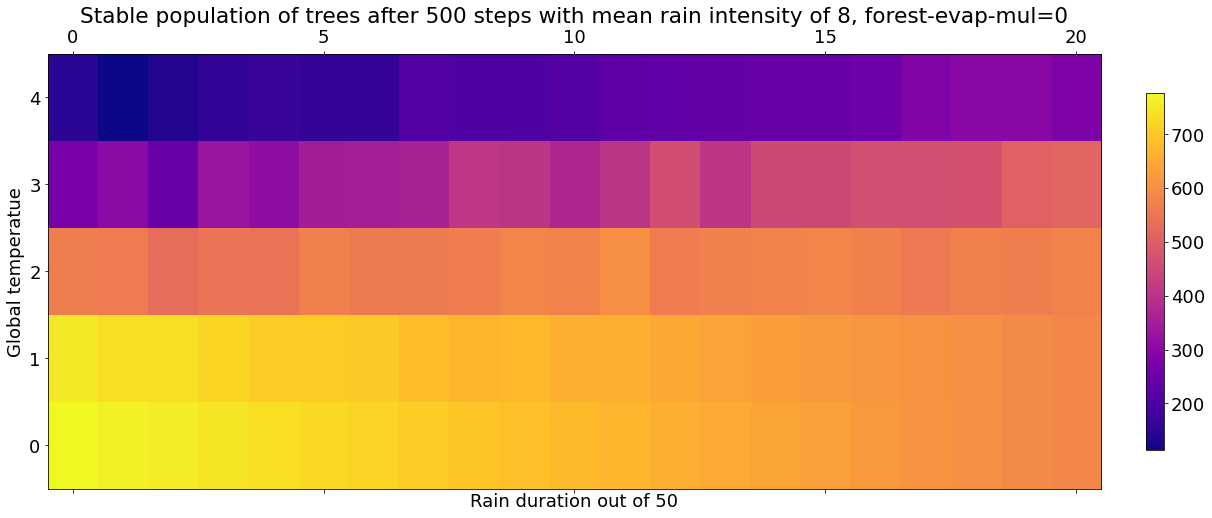

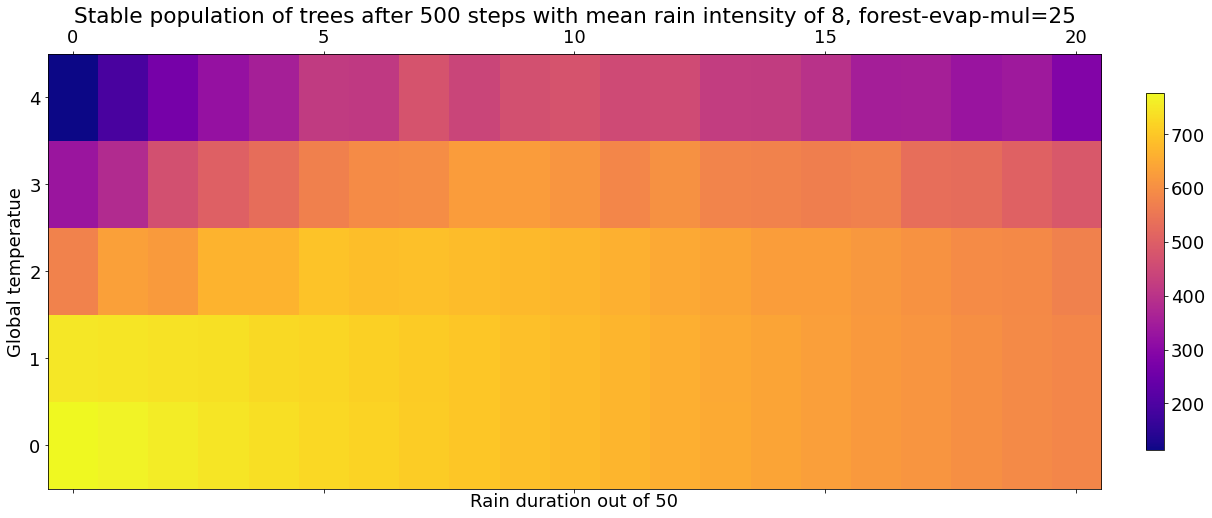

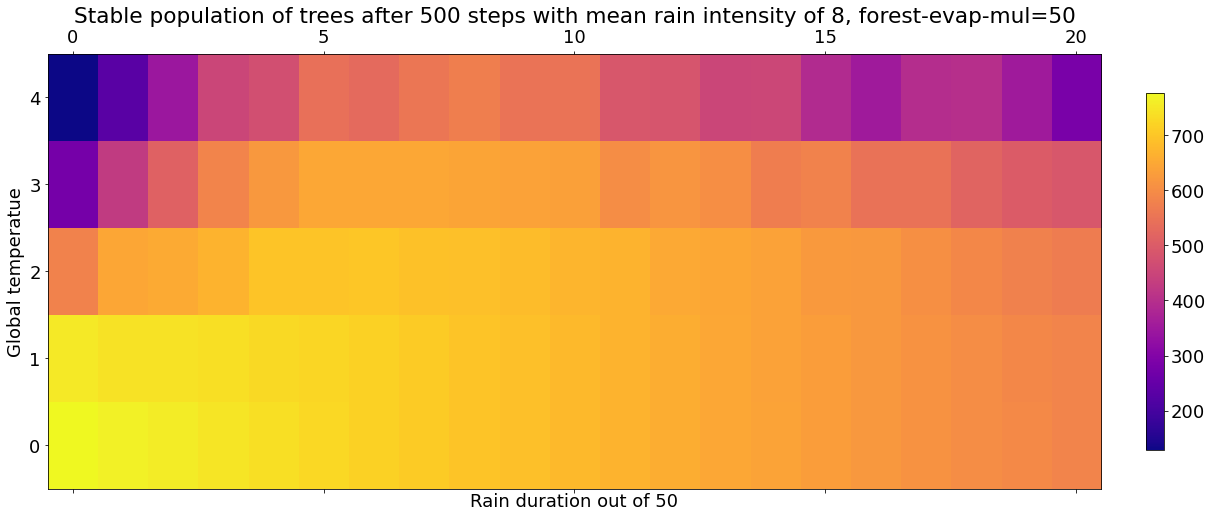

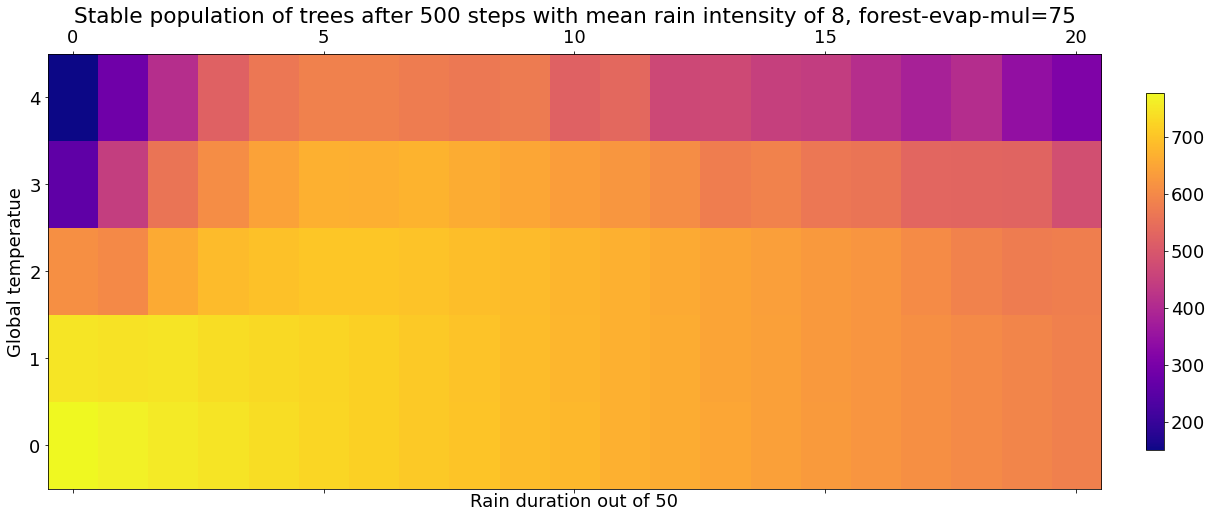

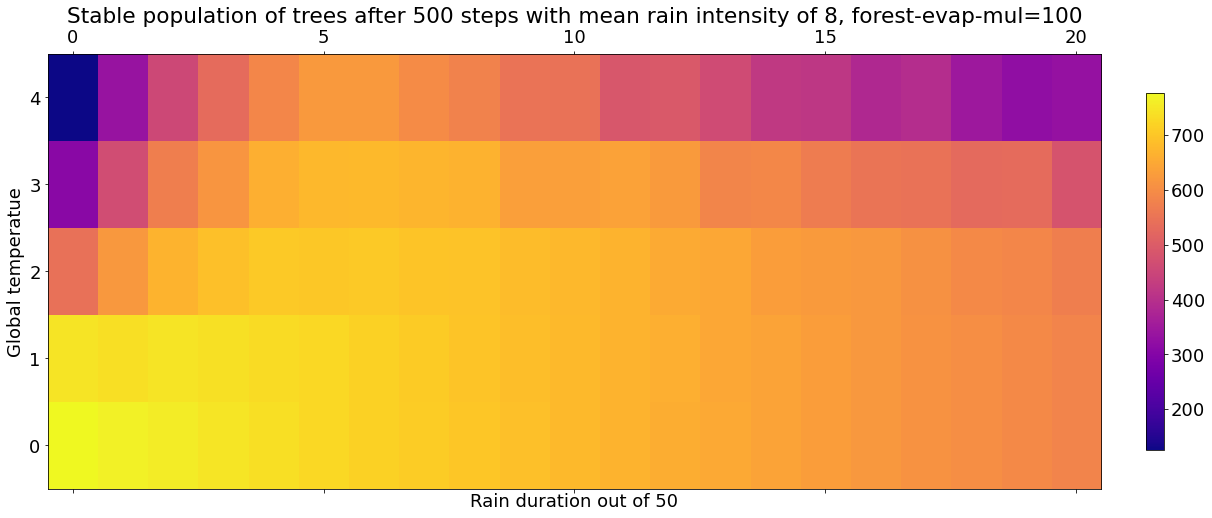

In [17]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rc('font', size=18) 


def get_index(ser):
    return {x: i for i, x in enumerate(sorted(ser.unique()))}


def to_matrix(values, params, valindex, xcol, ycol):
    xindex = get_index(params[xcol])
    yindex = get_index(params[ycol])
    
    mats = {}
    for evap_mul, rest_params in params.groupby("oak-tolerance-share"):
#         print(evap_mul)
        mat = np.zeros((len(yindex), len(xindex)))
        for param in rest_params.iloc:
            val = values.loc[param[valindex]]
            x = xindex[param[xcol]]
            y = yindex[param[ycol]]
            mat[y, x] = val
        mats[evap_mul] = mat
    
    return mats, xindex, yindex

def to_imgmat(mat):
    mat -= mat.min()
    mat *= 256/mat.max()
    mat = mat.astype(np.uint8)
    return mat

def to_img(mat):
    im = Image.fromarray(np.uint8(cm.gist_earth(myarray)*255))

    
def make_matrixes():
    mats, xindex, yindex = to_matrix(values, params, "[run number]", "oak-percentage", "rain-deviation")
    for evap_mul, mat in mats.items():
        title = f"Stable population of trees after 500 steps with mean rain intensity of 8, forest-evap-mul={evap_mul}"
        make_matrix(mat, title, xindex, yindex)
#     mat = to_imgmat(mat)
# img = to_img(mat)


def make_matrix(mat, title, xindex, yindex):
    fig = plt.figure(figsize=(20, 8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(mat, cmap="plasma", origin="lower", aspect="auto")
#     print(ax.axes.get_ylabels())
#     ax.yaxis.set_major_locator(ticker.FixedLocator(range(len(yindex))))
#     ax.yaxis.set_ticklabels(list(yindex.keys()))
    
    plt.colorbar(cax, fraction=0.0160, pad=0.04)
    
    ax.axes.set_title(title)
    ax.axes.set_ylabel("Global temperatue")
    ax.axes.set_xlabel("Rain duration out of 50")
    
#     ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
    
# #     ax.axes.set_xticks([x + 1 for x in ax.axes.get_xticks().tolist()[1:-1]])
#     ax.axes.set_xticks([0, *range(4, 50, 5)])
#     ax.axes.set_xticklabels([1, *range(5, 51, 5)])

make_matrixes()